## Einf√ºhrung in Python f√ºr Data Analytics
# Abschlussprojekt
### Dozent:
### Dr. Alessandro Bramucci
### Bearbeitung und Pr√§sentation:
### Jonathan Willrich, Gregor Henning, Sebastian Knoche

# Importieren der Bibliotheken

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ttest_ind as my_ttest
import statsmodels.api as sm
from IPython.core.display import HTML as my_html
import seaborn as sns

In [3]:
# Hilfsfunktion zur besseren Darstellung der Ausgaben
    
def pandas_to_html(pandas_obj, titel='Tabelle als HTML'):
    # Konvertiert eine pandas Series oder ein pandas DataFrame in eine HTML-Tabelle.

    # √úberpr√ºfen, ob das Objekt eine Series oder ein DataFrame ist
    if isinstance(pandas_obj, pd.Series):
         # Series in DataFrame umwandeln und Spaltennamen ableiten
        tmp_df = pandas_obj.to_frame(name=pandas_obj.name or 'Werte')
        if tmp_df.index.name is None:
            tmp_df.index.name = 'Index'
        html_table = tmp_df.reset_index().to_html(index=False)
    elif isinstance(pandas_obj, pd.DataFrame):
        html_table = pandas_obj.to_html()
    else:
        raise ValueError('Das √ºbergebene Objekt ist weder eine pandas Series noch ein DataFrame.')
    
    # CSS-Style hinzuf√ºgen
    css = '''
    <style>
        table {
            margin: 1px 0;
            font-size: 10px;
            text-align: left;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 1px;
        }
        th {
            background-color: #f2f2f2;
            color: black;
        }
    </style>
    '''
    
    return f'''
    {css}
    <h3>{titel}</h3>
    {html_table}
    '''

# Importieren der Daten

```python
# speichere den relativen Pfad und den Dateinamen der Quelle 
file_besucher = 'data/besucher.csv'
file_geo = 'data/geo.txt'
file_kunden = 'data/kunden.csv'

# importiere Daten aus der Quelle in Dataframes
df_besucher = pd.read_csv(file_besucher, sep=";", decimal = ',')
df_geo = pd.read_table(file_geo, decimal = '.')
df_kunden = pd.read_csv(file_kunden, sep=";", decimal = '.')
```

In [4]:
# speichere den relativen Pfad und den Dateinamen der Quelle 
file_besucher = 'data/besucher.csv'
file_geo = 'data/geo.txt'
file_kunden = 'data/kunden.csv'

# importiere Daten aus der Quelle in Dataframes
df_besucher = pd.read_csv(file_besucher, sep=";", decimal = ',')
df_geo = pd.read_table(file_geo, decimal = '.')
df_kunden = pd.read_csv(file_kunden, sep=";", decimal = '.')

# Bereinigen der Daten

## Analyse von df_besucher

In [5]:
html_ausgabe = pandas_to_html(df_besucher.isnull().sum(), 'Anzahl fehlender Werte')
display(my_html(html_ausgabe))

In [6]:
html_ausgabe = pandas_to_html(df_besucher.dtypes, 'Datentypen')
display(my_html(html_ausgabe))

In [7]:
html_ausgabe = pandas_to_html(df_besucher.head(5), 'Vorschau df_besucher')
display(my_html(html_ausgabe))

## Datenmodelierung f√ºr df_besucher

```python
# Um das sp√§tere Zusammenf√ºhren zu erleichtern, sind folgende Anpassungen hilfreich:

# F√ºge eine Spalte "Kunde" hinzu, die f√ºr Besucher den Wert 0 enth√§lt.
df_besucher['Kunde'] = 0

# F√ºge die Spalte "Preis" hinzu und setze die Werte auf 0
df_besucher.insert(2, 'Preis', 0)

# F√ºge die Spalte "Ausrei√üer" hinzu und setze die Werte auf False
df_besucher.insert(6, 'Ausrei√üer', False)
```

In [8]:
# Um das sp√§tere Zusammenf√ºhren zu erleichtern, sind folgende Anpassungen hilfreich:

# F√ºge eine Spalte "Kunde" hinzu, die f√ºr Besucher den Wert 0 enth√§lt.
df_besucher['Kunde'] = 0

# F√ºge die Spalte "Preis" hinzu und setze die Werte auf 0
df_besucher.insert(2, 'Preis', 0)

# F√ºge die Spalte "Ausrei√üer" hinzu und setze die Werte auf False
df_besucher.insert(6, 'Ausrei√üer', False)

## Analyse von df_geo

In [9]:
html_ausgabe = pandas_to_html(df_geo.isnull().sum(), 'Anzahl fehlender Werte')
display(my_html(html_ausgabe))

In [10]:
html_ausgabe = pandas_to_html(df_geo.dtypes, 'Datentypen')
display(my_html(html_ausgabe))

In [11]:
html_ausgabe = pandas_to_html(df_geo.head(5), 'Vorschau df_geo')
display(my_html(html_ausgabe))

## Datenmodelierung f√ºr df_geo

```python
# Ersetze alle Eintr√§ge, die "NRW" in der Spalte "Niederlassung" enthalten, mit "Nordrhein-Westfalen"
df_geo['Niederlassung'] = df_geo['Niederlassung'].apply(lambda x: 'Nordrhein-Westfalen' if 'NRW' in x else x)

# Ersetze alle Eintr√§ge, die "Berlin" in der Spalte "Niederlassung" enthalten, mit "Berlin"
df_geo['Niederlassung'] = df_geo['Niederlassung'].apply(lambda x: 'Berlin' if 'berlin' in x.lower() else x)
```

In [12]:
# Ersetze alle Eintr√§ge, die "NRW" in der Spalte "Niederlassung" enthalten, mit "Nordrhein-Westfalen"
df_geo['Niederlassung'] = df_geo['Niederlassung'].apply(lambda x: 'Nordrhein-Westfalen' if 'NRW' in x else x)

# Ersetze alle Eintr√§ge, die "Berlin" in der Spalte "Niederlassung" enthalten, mit "Berlin"
df_geo['Niederlassung'] = df_geo['Niederlassung'].apply(lambda x: 'Berlin' if 'berlin' in x.lower() else x)

## Analyse von df_kunden

In [13]:
html_ausgabe = pandas_to_html(df_kunden.isnull().sum(), 'Anzahl fehlender Werte')
display(my_html(html_ausgabe))

In [14]:
html_ausgabe = pandas_to_html(df_kunden.dtypes, 'Datentypen')
display(my_html(html_ausgabe))

In [15]:
html_ausgabe = pandas_to_html(df_kunden.head(5), 'Vorschau df_kunden')
display(my_html(html_ausgabe))

## Datenmodelierung f√ºr df_kunden

```python
# Berechne den Modus f√ºr die Werte in der Spalte "Geschlecht"
geschlecht_mode = df_kunden['Geschlecht'].mode()[0]
```

In [16]:
# Berechne den Modus f√ºr die Werte in der Spalte "Geschlecht"
geschlecht_mode = df_kunden['Geschlecht'].mode()[0]
print(f'Der Modus f√ºr das Geschlecht ist {geschlecht_mode}.')

Der Modus f√ºr das Geschlecht ist 1.0.


```python
# Ersetze alle leeren Eintr√§ge in der Spalte "Geschlecht" mit dem Modus der Werte in der Spalte "Geschlecht"
df_kunden['Geschlecht'].fillna(geschlecht_mode, inplace=True)

# Konvertiere die Spalte "Geschlecht" in den Integer-Datentyp
df_kunden['Geschlecht'] = df_kunden['Geschlecht'].astype(int)
```

In [17]:
# Ersetze alle leeren Eintr√§ge in der Spalte "Geschlecht" mit dem Modus der Werte in der Spalte "Geschlecht".
df_kunden['Geschlecht'].fillna(geschlecht_mode, inplace = True)

# Konvertiere die Spalte "Geschlecht" in den Integer-Datentyp.
df_kunden['Geschlecht'] = df_kunden['Geschlecht'].astype(int)

```python
# F√ºge eine Spalte "Kunde" hinzu, die f√ºr Kunden den Wert 1 enth√§lt.
df_kunden['Kunde'] = 1
```

In [18]:
# F√ºge eine Spalte "Kunde" hinzu, die f√ºr Kunden den Wert 1 enth√§lt.
df_kunden['Kunde'] = 1

## Weitere Datenmodelierung f√ºr df_kunden, um Ausrei√üer zu entfernen

```python
# Entfernen der Ausrei√üer in der Spalte "Einkommen":
# Berechnung von eink_Q1 (25. Perzentil), eink_Q3 (75. Perzentil) und eink_IQR
eink_Q1 = df_kunden['Einkommen'].quantile(0.25)
eink_Q3 = df_kunden['Einkommen'].quantile(0.75)
eink_IQR = eink_Q3 - eink_Q1

# Berechnung der Ausrei√üer-Grenzen
eink_untere_grenze = eink_Q1 - 1.5 * eink_IQR
eink_obere_grenze = eink_Q3 + 1.5 * eink_IQR

# Identifizierung von Ausrei√üern
df_kunden['Ausrei√üer'] = (df_kunden['Einkommen'] < eink_untere_grenze) | (df_kunden['Einkommen'] > eink_obere_grenze)
```

In [19]:
# Entfernen der Ausrei√üer in der Spalte "Einkommen":
# Berechnung von eink_Q1 (25. Perzentil), eink_Q3 (75. Perzentil) und eink_IQR
eink_Q1 = df_kunden['Einkommen'].quantile(0.25)
eink_Q3 = df_kunden['Einkommen'].quantile(0.75)
eink_IQR = eink_Q3 - eink_Q1

# Berechnung der Ausrei√üer-Grenzen
eink_untere_grenze = eink_Q1 - 1.5 * eink_IQR
eink_obere_grenze = eink_Q3 + 1.5 * eink_IQR

# Identifizierung von Ausrei√üern
df_kunden['Ausrei√üer'] = (df_kunden['Einkommen'] < eink_untere_grenze) | (df_kunden['Einkommen'] > eink_obere_grenze)

```python
# Berechne den Median f√ºr die Werte in der Spalte "Einkommen"
eink_median = df_kunden['Einkommen'].median()
```

In [20]:
# Berechne den Median f√ºr die Werte in der Spalte "Einkommen"
eink_median = df_kunden['Einkommen'].median()

print(f'Der Median f√ºr das Einkomen ist {eink_median:.2f} EUR.')

Der Median f√ºr das Einkomen ist 59013.00 EUR.


```python
# Ersetze Ausrei√üer mit dem Median der Spalte "Einkommen"
df_kunden.loc[df_kunden['Ausrei√üer'] == True, 'Einkommen'] = eink_median
```

In [21]:
# Ersetze Ausrei√üer mit dem Median der Spalte "Einkommen"
df_kunden.loc[df_kunden['Ausrei√üer'] == True, 'Einkommen'] = eink_median

```python
# Entfernen der Ausrei√üer in der Spalte "Alter":
# Berechnung von alt_Q1 (25. Perzentil), alt_Q3 (75. Perzentil) und alt_IQR
alt_Q1 = df_kunden['Alter'].quantile(0.25)
alt_Q3 = df_kunden['Alter'].quantile(0.75)
alt_IQR = alt_Q3 - alt_Q1

# Berechnung der Ausrei√üer-Grenzen
alt_untere_grenze = alt_Q1 - 1.5 * alt_IQR
alt_obere_grenze = alt_Q3 + 1.5 * alt_IQR

# Identifizierung von Ausrei√üern
df_kunden['Ausrei√üer'] = (df_kunden['Alter'] < alt_untere_grenze) | (df_kunden['Alter'] > alt_obere_grenze)
```

In [22]:
# Entfernen der Ausrei√üer in der Spalte "Alter":
# Berechnung von alt_Q1 (25. Perzentil), alt_Q3 (75. Perzentil) und alt_IQR
alt_Q1 = df_kunden['Alter'].quantile(0.25)
alt_Q3 = df_kunden['Alter'].quantile(0.75)
alt_IQR = alt_Q3 - alt_Q1

# Berechnung der Ausrei√üer-Grenzen
alt_untere_grenze = alt_Q1 - 1.5 * alt_IQR
alt_obere_grenze = alt_Q3 + 1.5 * alt_IQR

# Identifizierung von Ausrei√üern
df_kunden['Ausrei√üer'] = (df_kunden['Alter'] < alt_untere_grenze) | (df_kunden['Alter'] > alt_obere_grenze)

```python
# Berechne den Median f√ºr die Werte in der Spalte "Alter"
alt_median = df_kunden['Alter'].median()
```

In [23]:
# Berechne den Median f√ºr die Werte in der Spalte "Alter"
alt_median = df_kunden['Alter'].median()

print(f'Der Median f√ºr das Alter ist {alt_median:.2f} Jahre.')

Der Median f√ºr das Alter ist 51.00 Jahre.


```python
# Ersetze Ausrei√üer mit dem Median der Spalte "Alter"
df_kunden.loc[df_kunden['Ausrei√üer'] == True, 'Alter'] = alt_median
```

In [24]:
# Ersetze Ausrei√üer mit dem Median der Spalte "Alter"
df_kunden.loc[df_kunden['Ausrei√üer'] == True, 'Alter'] = alt_median

## Zusammenf√ºhren von df_besucher und df_geo

```python
# Zusammenf√ºhren von df_besucher und df_geo basierend auf KundeNr
df_besucher_geo = pd.merge(df_besucher, df_geo, on='KundeNr', how='left')

# Zusammenf√ºhren von df_kunden und df_geo basierend auf KundeNr
df_kunden_geo = pd.merge(df_kunden, df_geo, on='KundeNr', how='left')
```

In [25]:
# Zusammenf√ºhren von df_besucher und df_geo basierend auf KundeNr
df_besucher_geo = pd.merge(df_besucher, df_geo, on='KundeNr', how='left')

# Zusammenf√ºhren von df_kunden und df_geo basierend auf KundeNr
df_kunden_geo = pd.merge(df_kunden, df_geo, on='KundeNr', how='left')

```python
# Zusammenf√ºhren von df_besucher_geo und df_kunden_geo zu df_gesamt
df_gesamt = pd.concat([df_besucher_geo, df_kunden_geo], ignore_index=True)

# Bereinigten und zusammengef√ºhrten DataFrame df_gesamt als CSV speichern
df_gesamt.to_csv('data/df_gesamt.csv', index=False)
```

In [26]:
# Zusammenf√ºhren von df_besucher_geo und df_kunden_geo zu df_gesamt
df_gesamt = pd.concat([df_besucher_geo, df_kunden_geo], ignore_index=True)

# Bereinigten und zusammengef√ºhrten DataFrame df_gesamt als CSV speichern
df_gesamt.to_csv('data/df_gesamt.csv', index=False)

# CEO

## kurzpr√§sentation I

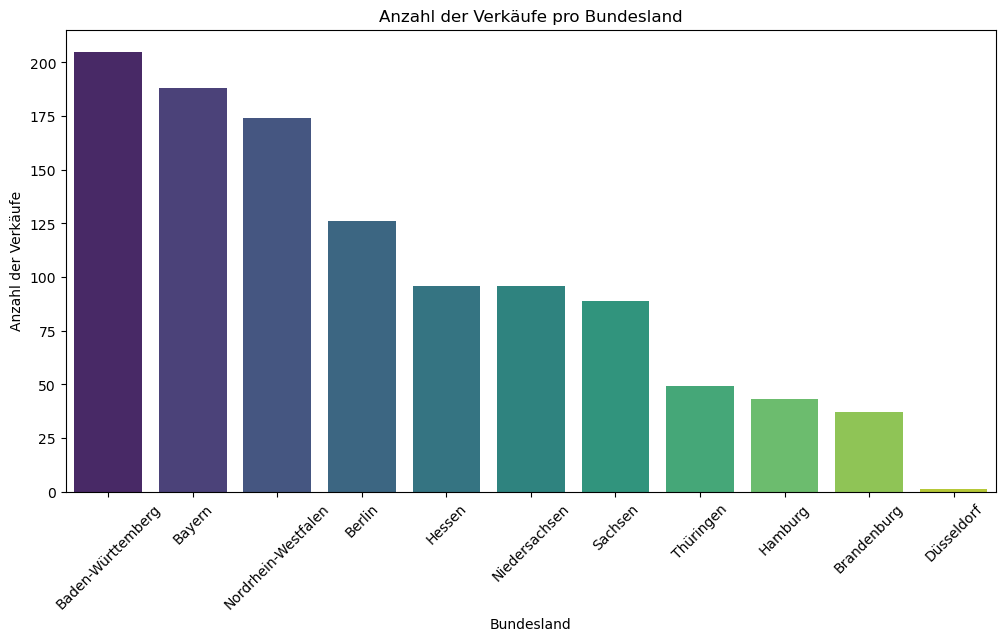

In [46]:
# Liste der Bundesl√§nder mit der Anzahl der Verk√§ufe
anz_verk_niederl = df_verk['Niederlassung'].value_counts()

# Nach der H√∂he sortieren und in eine neue Liste "anz_verk_sort" speichern
anz_verk_sort = anz_verk_niederl.sort_values(ascending=False)

# Erstellen und Anzeigen des Seaborn Balkendiagramms
plt.figure(figsize=(12, 6))
sns.barplot(x=anz_verk_sort.index, y=anz_verk_sort.values, palette='viridis')

# Diagramm beschriften
plt.title('Anzahl der Verk√§ufe pro Bundesland')
plt.xlabel('Bundesland')
plt.ylabel('Anzahl der Verk√§ufe')

# Achsenticks rotieren, wenn notwendig
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.show()

## kurzpr√§sentation II

Die meisten Autos wurden von Frauen gekauft,
sie haben 706 Autos gekauft.


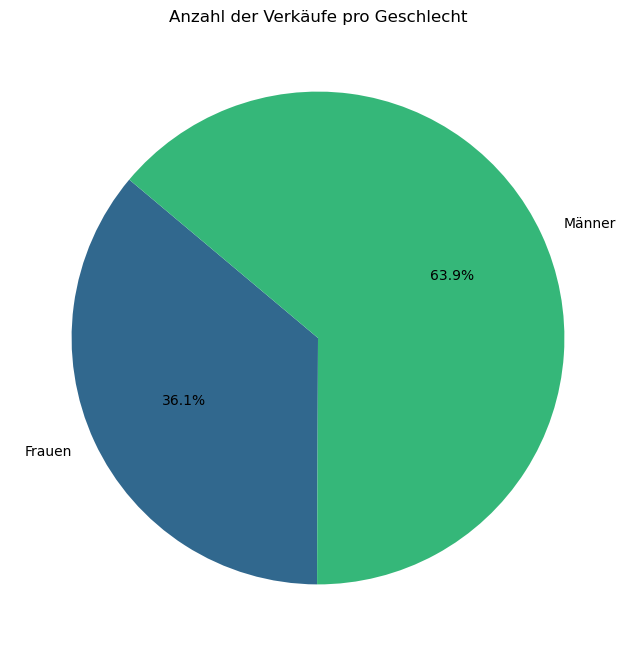

In [48]:
# Ermittlung der Anzahl der Verk√§ufe pro Geschlecht und umbenennen in "kauf_pro_geschl"
kauf_pro_geschl = df_verk.groupby('Geschlecht')['Geschlecht'].count()

# Finden des Geschlechts mit den meisten K√§ufen
max_geschl = 'M√§nnern' if kauf_pro_geschl.idxmax() == 'M√§nnlich' else 'Frauen'
max_verk = kauf_pro_geschl.max()

print(f'''Die meisten Autos wurden von {max_geschl} gekauft,
sie haben {max_verk} Autos gekauft.''')

# Erstellen und Anzeigen des Kreisdiagramms
plt.figure(figsize=(8, 8))
plt.pie(kauf_pro_geschl, labels=['Frauen', 'M√§nner'],
        autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('viridis', len(kauf_pro_geschl)))
# Diagramm beschriften
plt.title('Anzahl der Verk√§ufe pro Geschlecht')


# Diagramm anzeigen
plt.show()

## kurzpr√§sentation III

Das Durchschnittsalter der Kunden ist 50.38 Jahre.
Das Durchschnittsalter der Besucher ist 49.88 Jahre.


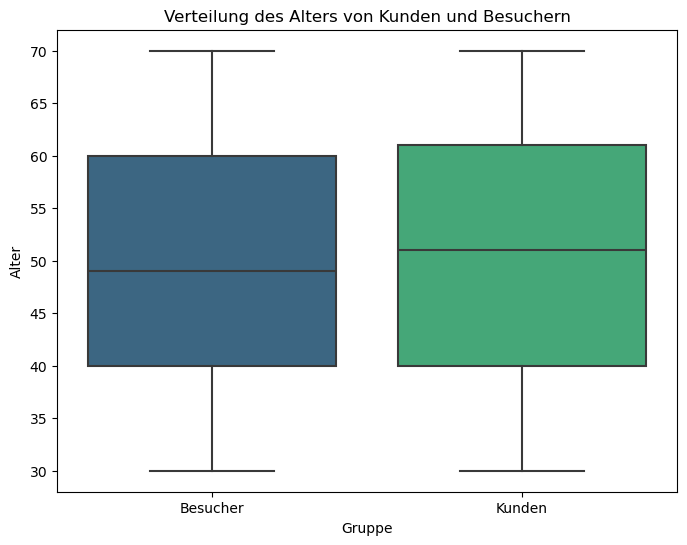

In [49]:
# Berechnung des Durchschnittsalters f√ºr Kunden und Besucher
mittel_alt_kunden = df_gesamt[df_gesamt['Kunde'] == 1]['Alter'].mean()
mittel_alt_besucher = df_gesamt[df_gesamt['Kunde'] == 0]['Alter'].mean()

print(f'''Das Durchschnittsalter der Kunden ist {mittel_alt_kunden:.2f} Jahre.
Das Durchschnittsalter der Besucher ist {mittel_alt_besucher:.2f} Jahre.''')

# Erstellen des Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kunde', y='Alter', data=df_gesamt, palette='viridis')

# Beschriftung anpassen
plt.xticks([0, 1], ['Besucher', 'Kunden'])
plt.xlabel('Gruppe')
plt.ylabel('Alter')
plt.title('Verteilung des Alters von Kunden und Besuchern')

# Diagramm anzeigen
plt.show()

## kurzpr√§sentation IV

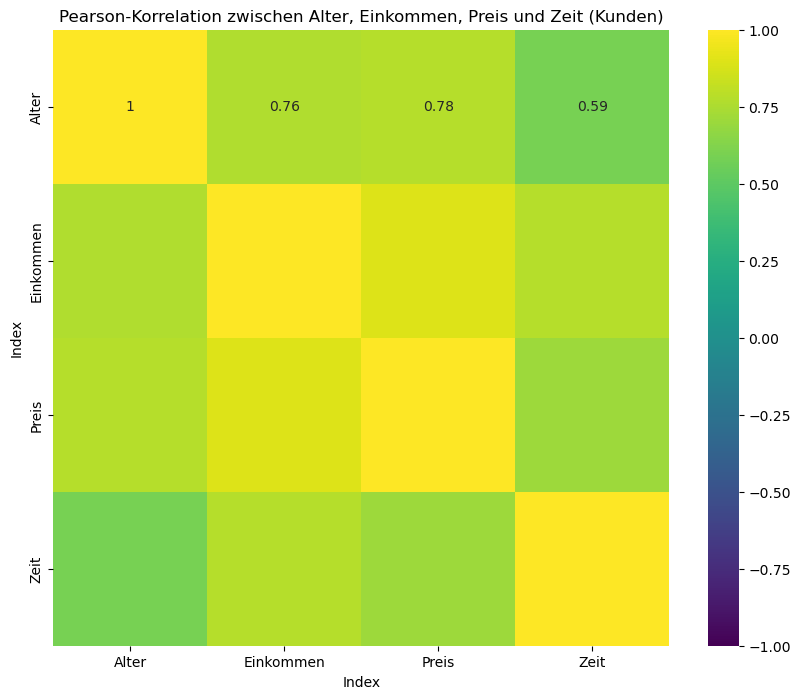

In [53]:
# Berechnung der Pearson-Korrelation (nur f√ºr Kunden)
r = df_verk[df_verk['Kunde'] == 1][['Alter', 'Einkommen', 'Preis', 'Zeit']].corr(method='pearson')

# Erstellen der Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(r, annot=True, cmap='viridis', vmin=-1, vmax=1, square=True)

# Beschriftung anpassen
plt.title('Pearson-Korrelation zwischen Alter, Einkommen, Preis und Zeit (Kunden)')
plt.show()

# Fragen

### F1: Wie viele Autos wurden verkauft?

```python
# Filtern der Verk√§ufe
df_verk = df_gesamt[df_gesamt['Kunde'] == True]

# Anzahl der Verk√§ufe ermitteln
anzahl_verk = len(df_verk)
```

In [27]:
# Filtern der Verk√§ufe
df_verk = df_gesamt[df_gesamt['Kunde'] == True]

# Anzahl der Verk√§ufe ermitteln
anzahl_verk = len(df_verk)
print(f'Anzahl der verkauften Autos: {anzahl_verk} Stk.')

Anzahl der verkauften Autos: 1104 Stk.


### F2: Was ist der H√∂chst-, Mindest- und Durchschnittspreis der verkauften Autos?

```python
# H√∂chster Verkaufspreis
max_preis = df_verk['Preis'].max()

# Niedrigster Verkaufspreis
min_preis = df_verk['Preis'].min()

# Durchschnittspreis
mittel_preis = df_verk['Preis'].mean()
```

In [28]:
# H√∂chster Verkaufspreis
max_preis = df_verk['Preis'].max()

# Niedrigster Verkaufspreis
min_preis = df_verk['Preis'].min()

# Durchschnittspreis
mittel_preis = df_verk['Preis'].mean()

# Ausgabe der Ergebnisse
print(f'''H√∂chster Verkaufspreis:   {max_preis:.2f} EUR
Niedrigster Verkaufspreis: {min_preis:.2f} EUR
Durchschnittspreis:        {mittel_preis:.2f} EUR''')

H√∂chster Verkaufspreis:   165482.31 EUR
Niedrigster Verkaufspreis: 21471.65 EUR
Durchschnittspreis:        88975.20 EUR


### F3: Wie hoch war der Gesamtumsatz?

```python
# Gesamtumsatz
gesamtumsatz = df_verk['Preis'].sum()
```

In [29]:
# Gesamtumsatz
gesamtumsatz = df_verk['Preis'].sum()
print(f'Gesamtumsatz: {gesamtumsatz:.2f} EUR')

Gesamtumsatz: 98228619.38 EUR


### F4: Wie viele Autos wurden pro Bundesland verkauft?

```python
# Liste der Bundesl√§nder mit der Anzahl der Verk√§ufe
anzahl_verk_niederl = df_verk['Niederlassung'].value_counts()

# Alphabetisch sortieren
anzahl_verk_niederl = anzahl_verk_niederl.sort_index()
```

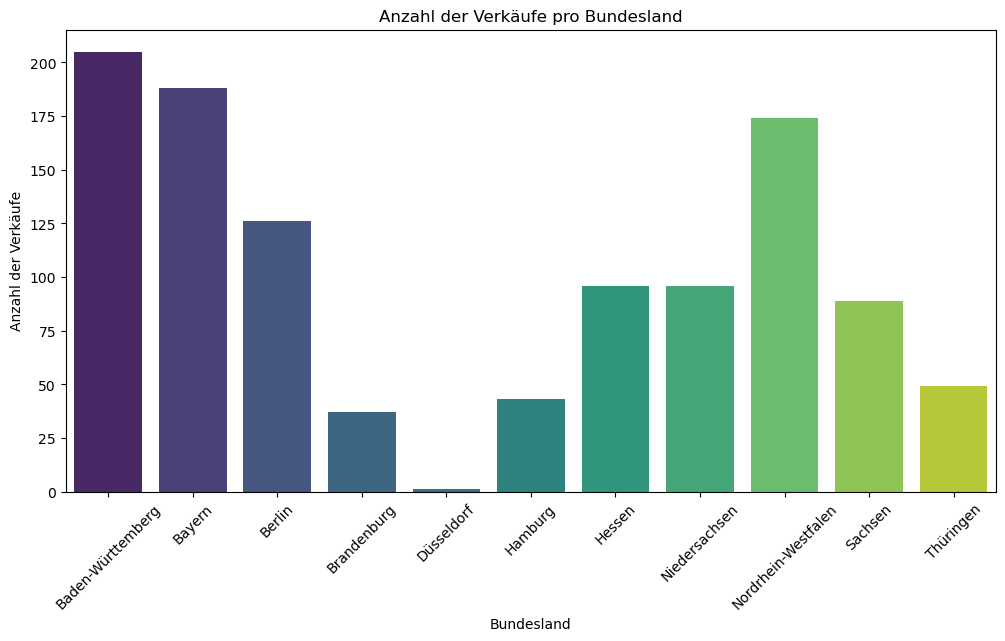

In [30]:
# Liste der Bundesl√§nder mit der Anzahl der Verk√§ufe
anz_verk_niederl = df_verk['Niederlassung'].value_counts()

# Alphabetisch sortieren
anz_verk_niederl = anz_verk_niederl.sort_index()

# Ausgabe
html_ausgabe = pandas_to_html(anz_verk_niederl, 'Anzahl der Verk√§ufe pro Bundesland in St√ºck')
display(my_html(html_ausgabe))


### F5: Wie hoch war der durchschnittliche Umsatz pro Bundesland?

```python
# Durchschnittlicher Umsatz pro Bundesland
umsatz_pro_niederl = df_verk.groupby('Niederlassung')['Preis'].mean()

# Runden auf zwei Nachkommastellen
umsatz_pro_niederl = umsatz_pro_niederl.round(2)
```

In [31]:
# Durchschnittlicher Umsatz pro Bundesland
umsatz_pro_niederl = df_verk.groupby('Niederlassung')['Preis'].mean()

# Runden auf zwei Nachkommastellen
umsatz_pro_niederl = umsatz_pro_niederl.round(2)

# Sortieren nach dem durchschnittlichem Umsatz (absteigend)
#umsatz_pro_niederl = umsatz_pro_niederl.sort_values(ascending=False)

# Ausgabe
html_ausgabe = pandas_to_html(umsatz_pro_niederl, 'Durchschnittlicher Umsatz pro Bundesland in EUR')
display(my_html(html_ausgabe))

### F6: In welchem Bundesland wurde das teuerste Auto verkauft?

```python
# Ermittlung der h√∂chsten Verkaufspreise f√ºr jedes Bundesland
max_pro_niederl = df_verk.groupby('Niederlassung')['Preis'].max()

# Finden des Bundeslandes mit dem h√∂chsten Verkaufspreis
max_niederl = max_pro_niederl.idxmax()
max_preis = max_pro_niederl.max()
```

In [32]:
# Ermittlung der h√∂chsten Verkaufspreise f√ºr jedes Bundesland
max_pro_niederl = df_verk.groupby('Niederlassung')['Preis'].max()

# Finden des Bundeslandes mit dem h√∂chsten Verkaufspreis
max_niederl = max_pro_niederl.idxmax()
max_preis = max_pro_niederl.max()

print(f'Das Bundesland mit dem h√∂chsten Verkaufspreis ist {max_niederl} mit einem Preis von {max_preis} EUR.')

Das Bundesland mit dem h√∂chsten Verkaufspreis ist Niedersachsen mit einem Preis von 165482.31 EUR.


### F7: Haben mehr Frauen oder mehr M√§nner unsere Autos gekauft?

```python
# Ermittlung der Anzahl der Verk√§ufe pro Geschlecht
verk_pro_geschl = df_verk.groupby('Geschlecht')['Geschlecht'].count()

# Finden des Geschlechts mit den meisten K√§ufen
max_geschl = 'M√§nnern' if verk_pro_geschl.idxmax() else 'Frauen'
max_verk = verk_pro_geschl.max()
```

In [33]:
# Ermittlung der Anzahl der Verk√§ufe pro Geschlecht
verk_pro_geschl = df_verk.groupby('Geschlecht')['Geschlecht'].count()

# Finden des Geschlechts mit den meisten K√§ufen
max_geschl = 'M√§nnern' if verk_pro_geschl.idxmax() else 'Frauen'
max_verk = verk_pro_geschl.max()

print(f'''Die meisten Autos wurden von {max_geschl} gekauft,
sie haben {max_verk} Autos gekauft.''')

Die meisten Autos wurden von M√§nnern gekauft,
sie haben 706 Autos gekauft.


### F8: Wie hoch ist das Durchschnittsalter unserer Kunden? Wie hoch ist das Durchschnittsalter unserer Besucher?

```python
# Berechnung des Durchschnittsalters f√ºr Kunden und Besucher
mittel_alt_kunden = df_gesamt[df_gesamt['Kunde'] == 1]['Alter'].mean()
mittel_alt_besucher = df_gesamt[df_gesamt['Kunde'] == 0]['Alter'].mean()
```

In [34]:
# Berechnung des Durchschnittsalters f√ºr Kunden und Besucher
mittel_alt_kunden = df_gesamt[df_gesamt['Kunde'] == 1]['Alter'].mean()
mittel_alt_besucher = df_gesamt[df_gesamt['Kunde'] == 0]['Alter'].mean()

print(f'''Das Durchschnittsalter der Kunden ist {mittel_alt_kunden:.2f} Jahre.
Das Durchschnittsalter der Besucher ist {mittel_alt_besucher:.2f} Jahre.''')

Das Durchschnittsalter der Kunden ist 50.38 Jahre.
Das Durchschnittsalter der Besucher ist 49.88 Jahre.


### F9: Wie hoch ist das Durchschnittseinkommen unserer Kunden? Wie hoch ist das Durchschnittseinkommen unserer Besucher?

```python
# Filter nach Einkommen der Kunden
eink_kunden = df_gesamt[df_gesamt['Kunde'] == 1]['Einkommen']
# Filter nach Einkommen der Besucher
eink_besucher = df_gesamt[df_gesamt['Kunde'] == 0]['Einkommen']

# Berechnung der Durchschnittseinkommen f√ºr Kunden und Besucher
mittel_eink_kunden = eink_kunden.mean()
mittel_eink_besucher = eink_besucher.mean()
```

In [35]:
# Filter nach Einkommen der Kunden
eink_kunden = df_gesamt[df_gesamt['Kunde'] == 1]['Einkommen']
# Filter nach Einkommen der Besucher
eink_besucher = df_gesamt[df_gesamt['Kunde'] == 0]['Einkommen']

# Berechnung der Durchschnittseinkommen f√ºr Kunden und Besucher
mittel_eink_kunden = eink_kunden.mean()
mittel_eink_besucher = eink_besucher.mean()

print(f'''Das Durchschnittseinkommen der Kunden ist {mittel_eink_kunden:.2f} EUR.
Das Durchschnittseinkommen der Besucher ist {mittel_eink_besucher:.2f} EUR.''')

Das Durchschnittseinkommen der Kunden ist 58850.91 EUR.
Das Durchschnittseinkommen der Besucher ist 59367.94 EUR.


### F10: Bestimmen Sie, ob es einen statistisch signifikanten Unterschied zwischen dem Durchschnittseinkommen der Kunden und dem Durchschnittseinkommen der Besucher gibt.
#### Sie m√ºssen einen Zweistichproben-t-Test durchf√ºhren. Beginnen Sie mit der Aufstellung der Null- und Alternativhypothese. Verwenden Sie ein Signifikanzniveau (Œ±) von 5%. Nehmen Sie an, dass die Varianzen der beiden Gruppen gleich sind.

Nullhypothese (H0‚Äã): Es gibt keinen Unterschied zwischen dem Durchschnittseinkommen der Kunden und der Besucher. (ŒºKunden=ŒºBesucher)

Alternativhypothese (H1‚Äã): Es gibt einen Unterschied zwischen dem Durchschnittseinkommen der Kunden und der Besucher. (ŒºKunden‚â†ŒºBesucher‚Äã)

Wir verwenden ein Signifikanzniveau (Œ±) von 5%.

```python
# Zweistichproben-t-Test durchf√ºhren, unter der Annahme, dass die Varianzen gleich sind (usevar='pooled')
t_stat, p_value, df = my_ttest(eink_kunden, eink_besucher, usevar='pooled')

# Entscheidung basierend auf dem p-Wert
alpha = 0.05
stat_signifikant = p_value < alpha
```

In [36]:
# Zweistichproben-t-Test durchf√ºhren, unter der Annahme, dass die Varianzen gleich sind (usevar='pooled')
t_stat, p_value, df = my_ttest(eink_kunden, eink_besucher, usevar='pooled')

print(f'''Ergebnisse des Zweistichproben-t-Tests:
t-Statistik: {t_stat:.2f}
p-Wert: {p_value:.5f}\n''')

# Entscheidung basierend auf dem p-Wert
alpha = 0.05
stat_signifikant = p_value < alpha
if stat_signifikant:
    print('''Es gibt einen statistisch signifikanten Unterschied
zwischen dem Durchschnittseinkommen der Kunden und dem der Besucher.''')
else:
    print('''Es gibt keinen statistisch signifikanten Unterschied
zwischen dem Durchschnittseinkommen der Kunden und dem der Besucher.''')

Ergebnisse des Zweistichproben-t-Tests:
t-Statistik: -0.70
p-Wert: 0.48183

Es gibt keinen statistisch signifikanten Unterschied
zwischen dem Durchschnittseinkommen der Kunden und dem der Besucher.


### F11: Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit?
#### Berechnen Sie die Korrelation nur f√ºr Kunden.

```python
# Berechnung der Pearson-Korrelation (nur f√ºr Kunden)
r = df_verk[['Alter', 'Einkommen', 'Preis', 'Zeit']].corr(method='pearson')
```

In [37]:
# Berechnung der Pearson-Korrelation (nur f√ºr Kunden)
r = df_verk[['Alter', 'Einkommen', 'Preis', 'Zeit']].corr(method='pearson')

# HTML Ausgabe
html_ausgabe = pandas_to_html(r, 'Korrelation zwischen den Variablen Alter, Einkommen, Preis und Zeit f√ºr Kunden')
display(my_html(html_ausgabe))

### F12: Testen Sie grafisch mit Hilfe eines qq-Plots, ob die Variable Zeit approximativ normalverteilt ist.
#### Kunden und Besucher zusammen.

```python
# Daten f√ºr den QQ-Plot
zeit = df_gesamt['Zeit']

# QQ-Plot erstellen
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(zeit, line='s', ax=ax)
ax.set_title('Variable Zeit in Relation zur Standardnormalverteilung')

# Speichern des QQ-Plots als Bild
plt.savefig('images/qq_plot_zeit.png')
```

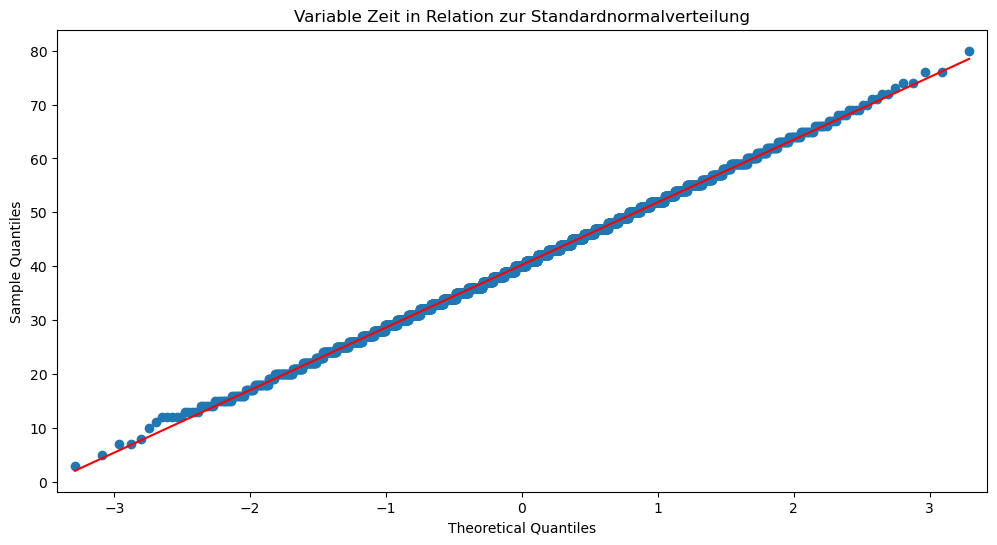

In [38]:
# Daten f√ºr den QQ-Plot
zeit = df_gesamt['Zeit']

# QQ-Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))  # Gr√∂√üe des Plots festlegen
sm.qqplot(zeit, line='s', ax=ax)  # QQ-Plot erstellen, 's' f√ºr Standardnormalverteilung
ax.set_title('Variable Zeit in Relation zur Standardnormalverteilung')  # Titel des Plots
#ax.set_xlabel('x')  # Beschriftung der x-Achse
#ax.set_ylabel('y')  # Beschriftung der y-Achse

# Speichern des QQ-Plots als Bild
plt.savefig('images/qq_plot_zeit.png')
plt.show()

### F13: Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen? Die Kundenabteilung hat vergessen, diese Informationen zu erfassen. Wir k√∂nnen davon ausgehen, dass die Kunden mit einem Jahreseinkommen h√∂her als der Autopreis keinen Kredit aufgenommen haben.

```python
# Kunden ohne Bankkredit berechnen
kunden_ohne_kredit = df_verk[df_verk['Einkommen'] > df_verk['Preis']]
anz_kunden_ohne_kredit = len(kunden_ohne_kredit)
```

In [39]:
# Kunden ohne Bankkredit berechnen
kunden_ohne_kredit = df_verk[df_verk['Einkommen'] > df_verk['Preis']]
anz_kunden_ohne_kredit = len(kunden_ohne_kredit)
print(f'Die Anzahl der Kunden, die keinen Bankkredit aufgenommen haben ist {anz_kunden_ohne_kredit}.')

Die Anzahl der Kunden, die keinen Bankkredit aufgenommen haben ist 5.


### F14: Welche sozio√∂konomischen Merkmale beeinflussen den Kaufpreis? W√§hlen Sie die geeigneten unabh√§ngigen Variablen aus und sch√§tzen Sie eine Regression unter Verwendung der geeigneten Methode.
#### Verwenden Sie die Bibliothek statsmodel und nicht sklearn.

```python
# Unabh√§ngige Variablen ausw√§hlen
X_ml = df_verk[['Alter', 'Einkommen', 'Geschlecht']]
X_ml = sm.add_constant(X_ml)  # Konstante hinzuf√ºgen

# Abh√§ngige Variable
y_ml = df_verk['Preis']

# Regression sch√§tzen
model = sm.OLS(y_ml, X_ml).fit()
```

In [40]:
# Unabh√§ngige Variablen ausw√§hlen
X_ml = df_verk[['Alter', 'Einkommen', 'Geschlecht']]
X_ml = sm.add_constant(X_ml)  # Konstante hinzuf√ºgen

# Abh√§ngige Variable
y_ml = df_verk['Preis']

# Regression sch√§tzen
model = sm.OLS(y_ml, X_ml).fit()

# Summary in HTML rendern und anzeigen
html_summary = model.summary().as_html()
display(my_html(html_summary))

### F15: Prognostizieren Sie den Kaufpreis eines unserer Autos f√ºr einen m√§nnlichen Kunden im Alter von 32 Jahren mit einem Einkommen von 30.000 Euro. Prognostizieren Sie den Kaufpreis eines unserer Autos f√ºr einen m√§nnlichen Kunden im Alter von 51 Jahren und mit einem Einkommen von 54.000 Euro.

```python
# Prognose 1 (Preis): Alter 32, Geschlecht 1, Einkommen 30000
X_predict1_ml = pd.DataFrame({'Alter': [32], 'Einkommen': [30000], 'Geschlecht': [1]})
X_predict1_ml = sm.add_constant(X_predict1_ml, has_constant='add')
prediction1_ml = model.predict(X_predict1_ml)

# Prognose 2 (Preis): Alter 51, Geschlecht 1, Einkommen 54000
X_predict2_ml = pd.DataFrame({'Alter': [51], 'Einkommen': [54000], 'Geschlecht': [1]})
X_predict2_ml = sm.add_constant(X_predict2_ml, has_constant='add')
prediction2_ml = model.predict(X_predict2_ml)
```

In [41]:
# Prognose 1 (Preis): Alter 32, Geschlecht 1, Einkommen 30000
X_predict1_ml = pd.DataFrame({'Alter': [32], 'Einkommen': [30000], 'Geschlecht': [1]})
X_predict1_ml = sm.add_constant(X_predict1_ml, has_constant='add')
prediction1_ml = model.predict(X_predict1_ml)
print(f'''F√ºr einen m√§nnlichen Kunden im Alter von 32 Jahren, mit einem Einkommen von 30.000 Euro,
betr√§gt der prognostizierte Kaufpreis eines Autos {prediction1_ml.iloc[0]:.2f} EUR\n''')

# Prognose 2 (Preis): Alter 51, Geschlecht 1, Einkommen 54000
X_predict2_ml = pd.DataFrame({'Alter': [51], 'Einkommen': [54000], 'Geschlecht': [1]})
X_predict2_ml = sm.add_constant(X_predict2_ml, has_constant='add')
prediction2_ml = model.predict(X_predict2_ml)
print(f'''F√ºr einen m√§nnlichen Kunden im Alter von 51 Jahren, mit einem Einkommen von 54.000 Euro,
betr√§gt der prognostizierte Kaufpreis eines Autos {prediction2_ml.iloc[0]:.2f} EUR''')

F√ºr einen m√§nnlichen Kunden im Alter von 32 Jahren, mit einem Einkommen von 30.000 Euro,
betr√§gt der prognostizierte Kaufpreis eines Autos 50345.86 EUR

F√ºr einen m√§nnlichen Kunden im Alter von 51 Jahren, mit einem Einkommen von 54.000 Euro,
betr√§gt der prognostizierte Kaufpreis eines Autos 84999.83 EUR


### F16: In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am meisten? Mit anderen Worten: Die von Ihnen gesch√§tzten Regressionskoeffizienten m√ºssen direkt vergleichbar sein. Wie sollen die Daten transformiert werden?
#### Sie m√ºssen die standardisierten Koeffizienten sch√§tzen.

```python
# Daten standardisieren
df_verk_stand = df_verk.copy()
df_verk_x = df_verk[['Alter', 'Einkommen', 'Geschlecht']]
df_verk_mu = df_verk[['Alter', 'Einkommen', 'Geschlecht']].mean()
df_verk_sd = df_verk[['Alter', 'Einkommen', 'Geschlecht']].std()
df_verk_stand[['Alter', 'Einkommen', 'Geschlecht']] = (df_verk_x - df_verk_mu) / df_verk_sd

# Unabh√§ngige Variablen ausw√§hlen
X_stand = df_verk_stand[['Alter', 'Einkommen', 'Geschlecht']]
X_stand = sm.add_constant(X_stand)  # Konstante hinzuf√ºgen

# Regression mit standardisierten Variablen sch√§tzen
model_stand = sm.OLS(y_ml, X_stand).fit()
```

In [42]:
# Daten standardisieren
df_verk_stand = df_verk.copy()
df_verk_x = df_verk[['Alter', 'Einkommen', 'Geschlecht']]
df_verk_mu = df_verk[['Alter', 'Einkommen', 'Geschlecht']].mean()
df_verk_sd = df_verk[['Alter', 'Einkommen', 'Geschlecht']].std()
df_verk_stand[['Alter', 'Einkommen', 'Geschlecht']] = (df_verk_x - df_verk_mu) / df_verk_sd

# Unabh√§ngige Variablen ausw√§hlen
X_stand = df_verk_stand[['Alter', 'Einkommen', 'Geschlecht']]
X_stand = sm.add_constant(X_stand)  # Konstante hinzuf√ºgen

# Regression mit standardisierten Variablen sch√§tzen
model_stand = sm.OLS(y_ml, X_stand).fit()

# Summary in HTML rendern und anzeigen
html_summary = model_stand.summary().as_html()
display(my_html(html_summary))

### F17: Sch√§tzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt. Verwenden Sie die entsprechende Methode.
#### Sie m√ºssen eine logistische Regression durchf√ºhren.

```python
# Logistische Regression
y_lg = df_gesamt['Kunde']
X_lg = df_gesamt[['Alter', 'Einkommen', 'Geschlecht', 'Zeit']]
X_lg = sm.add_constant(X_lg)

model_lg = sm.Logit(y_lg, X_lg).fit()
print(model_lg.summary())
```

In [43]:
# Logistische Regression
y_lg = df_gesamt['Kunde']
X_lg = df_gesamt[['Alter', 'Einkommen', 'Geschlecht', 'Zeit']]
X_lg = sm.add_constant(X_lg)

model_lg = sm.Logit(y_lg, X_lg).fit()

# Summary in HTML rendern und anzeigen
html_summary = model_lg.summary().as_html()
display(my_html(html_summary))

Optimization terminated successfully.
         Current function value: 0.578825
         Iterations 6


### F18: Wie hoch ist die Wahrscheinlichkeit, dass ein 32-j√§hriger m√§nnlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-j√§hriger m√§nnlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines unserer Modelle kauft?

```python
# Prognose 1 (Kaufwahrscheinlichkeit) Alter 32, Einkommen 30000, Geschlecht 1, Zeit 30
X_predict1_lg = pd.DataFrame({'Alter': [32], 'Einkommen': [30000], 'Geschlecht': [1], 'Zeit': [30]})
X_predict1_lg = sm.add_constant(X_predict1_lg, has_constant='add')
prediction1_lg = model_lg.predict(X_predict1_lg)

# Prognose 2 (Kaufwahrscheinlichkeit) Alter 51, Einkommen 54000, Geschlecht 1, Zeit 45
X_predict2_lg = pd.DataFrame({'Alter': [51], 'Einkommen': [54000], 'Geschlecht': [1], 'Zeit': [45]})
X_predict2_lg = sm.add_constant(X_predict2_lg, has_constant='add')
prediction2_lg = model_lg.predict(X_predict2_lg)
```

In [44]:
# Prognose 1 (Kaufwahrscheinlichkeit) Alter 32, Einkommen 30000, Geschlecht 1, Zeit 30
X_predict1_lg = pd.DataFrame({'Alter': [32], 'Einkommen': [30000], 'Geschlecht': [1], 'Zeit': [30]})
X_predict1_lg = sm.add_constant(X_predict1_lg, has_constant='add')
prediction1_lg = model_lg.predict(X_predict1_lg)
print(f'''F√ºr einen m√§nnlichen Kunden im Alter von 32 Jahren, mit einem Einkommen von 30.000 Euro und einer Testzeit von 30 Minuten,
betr√§gt die prognostizierte Kaufwahrscheinlichkeit eines Autos {100*prediction1_lg.iloc[0]:.2f} Prozent.\n''')

# Prognose 2 (Kaufwahrscheinlichkeit) Alter 51, Einkommen 54000, Geschlecht 1, Zeit 45
X_predict2_lg = pd.DataFrame({'Alter': [51], 'Einkommen': [54000], 'Geschlecht': [1], 'Zeit': [45]})
X_predict2_lg = sm.add_constant(X_predict2_lg, has_constant='add')
prediction2_lg = model_lg.predict(X_predict2_lg)
print(f'''F√ºr einen m√§nnlichen Kunden im Alter von 51 Jahren, mit einem Einkommen von 54.000 Euro und einer Testzeit von 45 Minuten,
betr√§gt die prognostizierte Kaufwahrscheinlichkeit eines Autos {100*prediction2_lg.iloc[0]:.2f} Prozent.''')

F√ºr einen m√§nnlichen Kunden im Alter von 32 Jahren, mit einem Einkommen von 30.000 Euro und einer Testzeit von 30 Minuten,
betr√§gt die prognostizierte Kaufwahrscheinlichkeit eines Autos 54.65 Prozent.

F√ºr einen m√§nnlichen Kunden im Alter von 51 Jahren, mit einem Einkommen von 54.000 Euro und einer Testzeit von 45 Minuten,
betr√§gt die prognostizierte Kaufwahrscheinlichkeit eines Autos 74.04 Prozent.


# Probleme

## F19: Auf welche Probleme sind Sie bei der Zusammenf√ºhrung des Datensatzes gesto√üen? Stellen Sie die Operationen vor, die Sie zum Zusammenf√ºhren und Bereinigen der Daten durchgef√ºhrt haben.

### Es gab leere Eintr√§ge beim Geschlecht im Datensatz Kunden.csv

```python
# Identifizieren der leeren Eintr√∂ge im Datensatz Kunden.csv
html_ausgabe = pandas_to_html(df_kunden.isnull().sum(), 'Anzahl fehlender Werte')
display(my_html(html_ausgabe))

# Ersetze alle leeren Eintr√§ge in der Spalte "Geschlecht" mit dem Modus der Werte in der Spalte "Geschlecht"
df_kunden['Geschlecht'].fillna(geschlecht_mode, inplace=True)
```

### Die Daten f√ºr das Geschlecht im Datensatz Kunden.csv wurde als Datentyp integer angegeben¬∂

``` python
# Konvertiere die Spalte "Geschlecht" in den Integer-Datentyp
df_kunden['Geschlecht'] = df_kunden['Geschlecht'].astype(int).')
```

### Es gab mehrere Ausrei√üer im Datensatz Kunden beim Einkommen

```python
# Berechne den Median f√ºr die Werte in der Spalte "Einkommen"
eink_median = df_kunden['Einkommen'].median()

# Entfernen der Ausrei√üer in der Spalte "Alter":
# Berechnung von alt_Q1 (25. Perzentil), alt_Q3 (75. Perzentil) und alt_IQR
alt_Q1 = df_kunden['Alter'].quantile(0.25)
alt_Q3 = df_kunden['Alter'].quantile(0.75)
alt_IQR = alt_Q3 - alt_Q1

# Berechnung der Ausrei√üer-Grenzen
alt_untere_grenze = alt_Q1 - 1.5 * alt_IQR
alt_obere_grenze = alt_Q3 + 1.5 * alt_IQR

# Identifizierung von Ausrei√üern
df_kunden['Ausrei√üer'] = (df_kunden['Alter'] < alt_untere_grenze) | (df_kunden['Alter'] > alt_ob

# Ersetze Ausrei√üer mit dem Median der Spalte "Einkommen"
df_kunden.loc[df_kunden['Ausrei√üer'] == True, 'Einkommen'] = eink_median
ere_grenze)

### Es gab Ausrei√üer beim Alter der Kunden im Datensatz Kunden.csv

```python
# Ersetze Ausrei√üer mit dem Median der Spalte "Alter"
df_kunden.loc[df_kunden['Ausrei√üer'] == True, 'Alter'] = alt_median

### Es gab unterschiedliche Bezeichnungen in dem Datensatz geo.txt f√ºr die Bundesl√§nder Nordrheinwest-Westfahlen und Berlin

```python
# Ersetze alle Eintr√§ge, die "NRW" in der Spalte "Niederlassung" enthalten, mit "Nordrhein-Westfalen"
df_geo['Niederlassung'] = df_geo['Niederlassung'].apply(lambda x: 'Nordrhein-Westfalen' if 'NRW' in x else x)

# Ersetze alle Eintr√§ge, die "Berlin" in der Spalte "Niederlassung" enthalten, mit "Berlin"
df_geo['Niederlassung'] = df_geo['Niederlassung'].apply(lambda x: 'Berlin' if 'berlin' in x.lower() else x)

# Vorschl√§ge

### F20. Welche Vorschl√§ge w√ºrden Sie der Kundenabteilung f√ºr die Umfrage im n√§chsten Jahr machen? Welche zus√§tzlichen Informationen sollten gesammelt werden? Formulieren Sie zwei Vorschl√§ge.

### Vorgehensweise:


- Sauberkeit der Daten beachten, Fehlerquellen verhinden
- Eindeutige Bezeichnungen f√ºr Niederlassung verwenden


### Vorschlag 1:


- Welche Informationsquellen wurden f√ºr den Kauf genutzt (Empfehlungen von Freunde/Familie, Soziale Medien, Werbung (TV, Radio, Internet, Printmedien, ...))


### Vorschlag 2:

- Hauptgr√ºnde f√ºr den Fahrzeugkauf (z.B. Preis, Marke, Ausstattung, Qualit√§t, Umweltaspekte, ...)

# Vielen Dank f√ºr Ihre Aufmerksamkeit üêç 